Confusion Matrix for Logistic Regression:
[[172   0]
 [  0 148]]

Confusion Matrix for Decision Tree:
[[172   0]
 [  0 148]]

Confusion Matrix for Random Forest:
[[172   0]
 [  0 148]]

Confusion Matrix for Support Vector Machine:
[[172   0]
 [  0 148]]

Confusion Matrix for K-Nearest Neighbors:
[[172   0]
 [  0 148]]



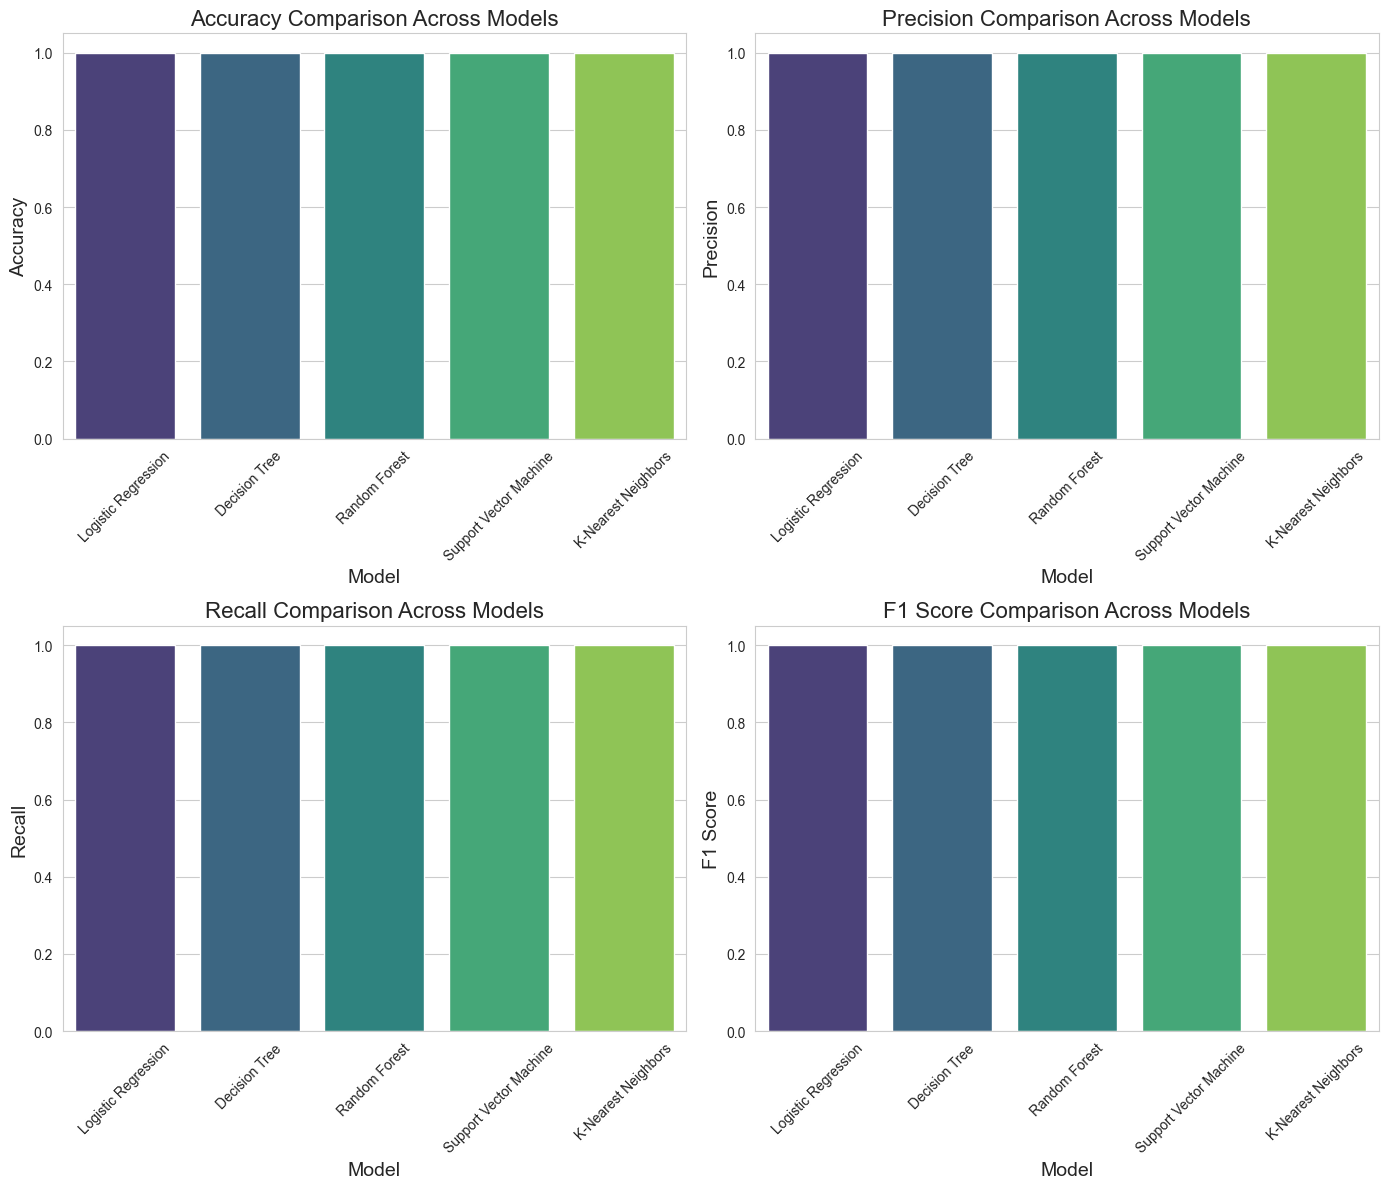

                    Model  Accuracy  Precision  Recall  F1 Score
0     Logistic Regression       1.0        1.0     1.0       1.0
1           Decision Tree       1.0        1.0     1.0       1.0
2           Random Forest       1.0        1.0     1.0       1.0
3  Support Vector Machine       1.0        1.0     1.0       1.0
4     K-Nearest Neighbors       1.0        1.0     1.0       1.0


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
df = pd.read_csv('../data/dataset.csv')

# Create avg_attendance and debarred columns
attendance_cols = ['Jan-24', 'Feb-24', 'Mar-24', 'Apr-24', 'May-24', 'Jun-24',
                   'Jul-24', 'Aug-24', 'Sep-24', 'Oct-24', 'Nov-24', 'Dec-24']
df['avg_attendance'] = df[attendance_cols].mean(axis=1)
df['debarred'] = (df['avg_attendance'] < 75).astype(int)

# Features and labels
X = df[['avg_attendance']]
y = df['debarred']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Dictionary to store results
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results['Model'].append(model_name)
    results['Accuracy'].append(acc)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {model_name}:\n{cm}\n")

# Create DataFrame for metrics
results_df = pd.DataFrame(results)

# Set seaborn style
sns.set_style("whitegrid")

# Pick 5 colors from viridis palette manually
colors = sns.color_palette('viridis', n_colors=5)

# Plot comparison for Accuracy, Precision, Recall, F1 Score
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Accuracy plot
sns.barplot(x='Model', y='Accuracy', hue='Model', data=results_df, palette=colors, ax=axes[0, 0], legend=False)
axes[0, 0].set_title('Accuracy Comparison Across Models', fontsize=16)
axes[0, 0].set_xlabel('Model', fontsize=14)
axes[0, 0].set_ylabel('Accuracy', fontsize=14)
axes[0, 0].tick_params(axis='x', rotation=45)

# Precision plot
sns.barplot(x='Model', y='Precision', hue='Model', data=results_df, palette=colors, ax=axes[0, 1], legend=False)
axes[0, 1].set_title('Precision Comparison Across Models', fontsize=16)
axes[0, 1].set_xlabel('Model', fontsize=14)
axes[0, 1].set_ylabel('Precision', fontsize=14)
axes[0, 1].tick_params(axis='x', rotation=45)

# Recall plot
sns.barplot(x='Model', y='Recall', hue='Model', data=results_df, palette=colors, ax=axes[1, 0], legend=False)
axes[1, 0].set_title('Recall Comparison Across Models', fontsize=16)
axes[1, 0].set_xlabel('Model', fontsize=14)
axes[1, 0].set_ylabel('Recall', fontsize=14)
axes[1, 0].tick_params(axis='x', rotation=45)

# F1 Score plot
sns.barplot(x='Model', y='F1 Score', hue='Model', data=results_df, palette=colors, ax=axes[1, 1], legend=False)
axes[1, 1].set_title('F1 Score Comparison Across Models', fontsize=16)
axes[1, 1].set_xlabel('Model', fontsize=14)
axes[1, 1].set_ylabel('F1 Score', fontsize=14)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print final results table
print(results_df)
